## 데이터 나누기

* 데이터를 훈련/테스트로 분리

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

In [65]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]
labels = iris.target

In [67]:
# test data: 20%, 훈련용: 80%
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=13)  

In [68]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [71]:
np.unique(y_test, return_counts=True)
# 이상적: [10개, 10개, 10개] --> stratify option으로 맞추기

(array([0, 1, 2]), array([ 9,  8, 13]))

* train 비율 맞추기

In [72]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2, 
                                                    stratify=labels,
                                                    random_state=13)  

In [73]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

* train만 대상으로 decision tree model 만들어 보기
* tree depth: tree 세로길이, depth 깊을수록 내가 준 데이터 대상 성능 높아짐 --> 규제 - 너무 최적화 안 되게 모델 제한

In [74]:
iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

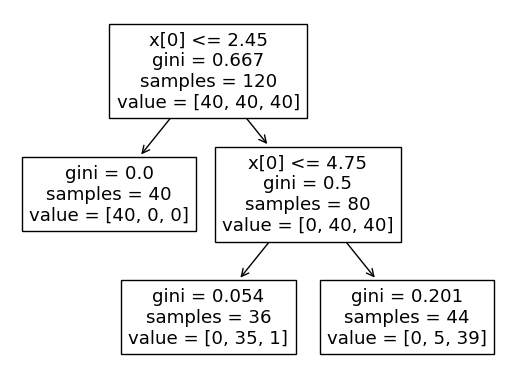

In [76]:
plt.figure()
plot_tree(iris_tree);

* accuracy 

In [78]:
y_pred_tr = iris_tree.predict(iris.data[:, 2:])
accuracy_score(iris.target, y_pred_tr)

0.9533333333333334

* 결정경계

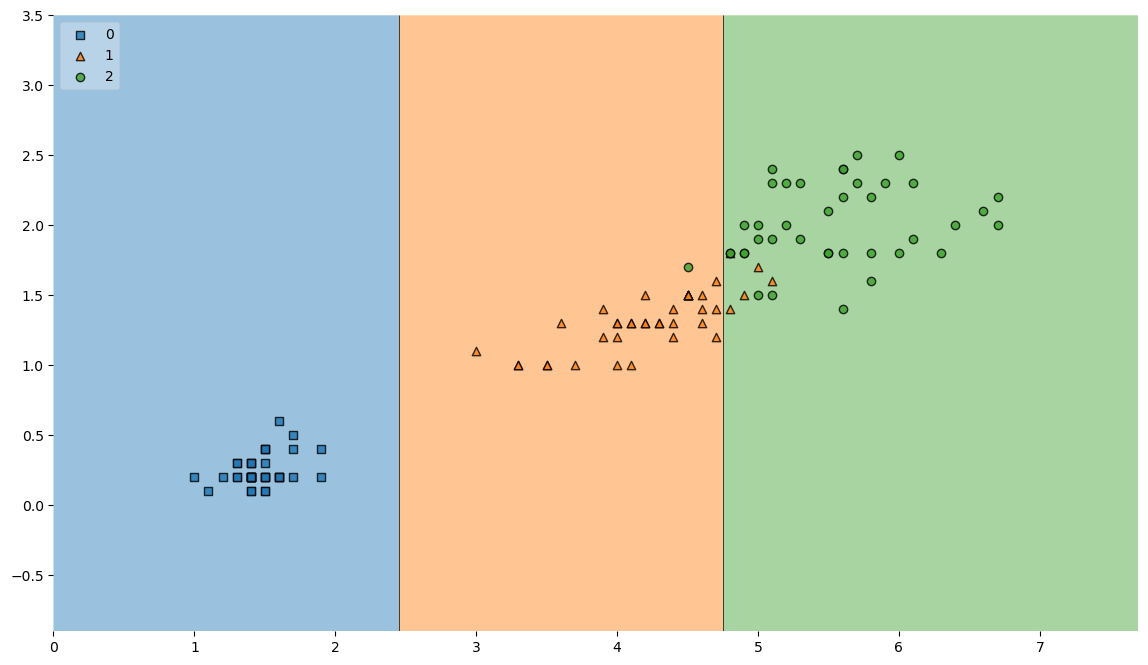

In [79]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(14, 8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
plt.show()

* test 데이터에 대한 accuracy

In [81]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

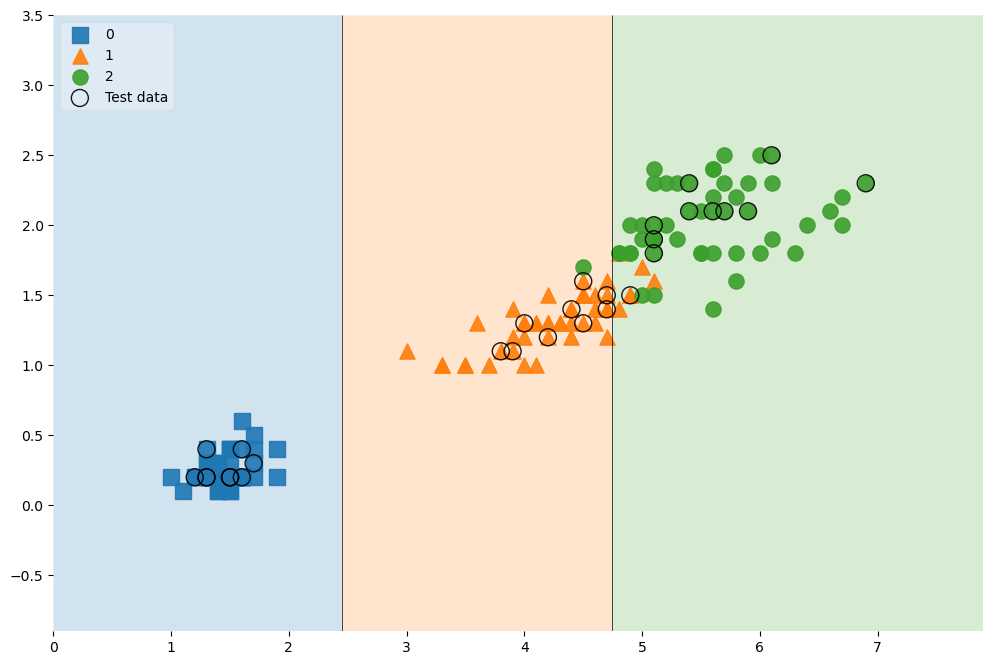

In [84]:
# 어떤 게 test 데이터로 선정되었는지 알아보기
scatter_highlight_kwargs = {'s':150, 'label':'Test data', 'alpha':0.9}
scatter_kwargs = {'s':120, 'edgecolor':None, 'alpha':0.9}

plt.figure(figsize=(12, 8))
plot_decision_regions(X=features, y=labels,
                      X_highlight=X_test, clf=iris_tree, legend=2,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs={'alpha':0.2}
                      );

In [86]:
# feature 4개
features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                    stratify=labels,
                                                    random_state=13
                                                    )
iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

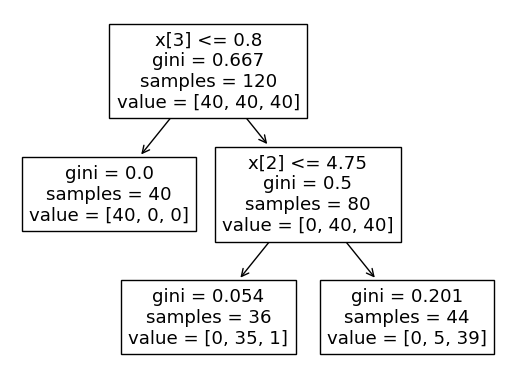

In [87]:
plt.figure()
plot_tree(iris_tree);

* 모델 사용하는 방법

* 길에서 주운 iris: sepal과 petal length, width

In [90]:
test_data = np.array([[4.3, 2., 1.2, 1.]])
iris_tree.predict(test_data)

array([1])

In [91]:
test_data.shape

(1, 4)

In [92]:
np.array([4.3, 2., 1.2, 1.]).shape

(4,)

In [96]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [98]:
iris_tree.predict_proba(test_data)  # setosa 일 확률 0, versicolor 97%, virginica 2% by 내 decision tree 모델

array([[0.        , 0.97222222, 0.02777778]])

In [99]:
iris.target_names[iris_tree.predict(test_data)]

array(['versicolor'], dtype='<U10')

* 주요 특성 확인

In [100]:
iris_tree.feature_importances_

array([0.        , 0.        , 0.42189781, 0.57810219])

## zip, unpacking
* 결과 보여주는 기술

In [101]:
dict(zip(iris.feature_names, iris_tree.feature_importances_))

# petal length, petal width 가 중요

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.42189781021897804,
 'petal width (cm)': 0.578102189781022}

* 리스트를 튜블로 zip

In [102]:
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]

In [105]:
pairs = [pair for pair in zip(list1, list2)]
pairs

[('a', 1), ('b', 2), ('c', 3)]

In [106]:
dict(pairs)

{'a': 1, 'b': 2, 'c': 3}

In [107]:
dict(zip(list1, list2))

{'a': 1, 'b': 2, 'c': 3}

In [108]:
x, y = zip(*pairs)

In [109]:
x

('a', 'b', 'c')

In [110]:
y

(1, 2, 3)

In [111]:
list(x)

['a', 'b', 'c']